<a href="https://colab.research.google.com/github/BagusSatria123/PCVK_Genap_2021/blob/master/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


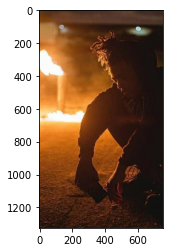

In [47]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img_f = cv.imread('/content/drive/MyDrive/pcvk/img/riot.jpg')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

**Tugas Praktikum**

**Nomor 1**

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


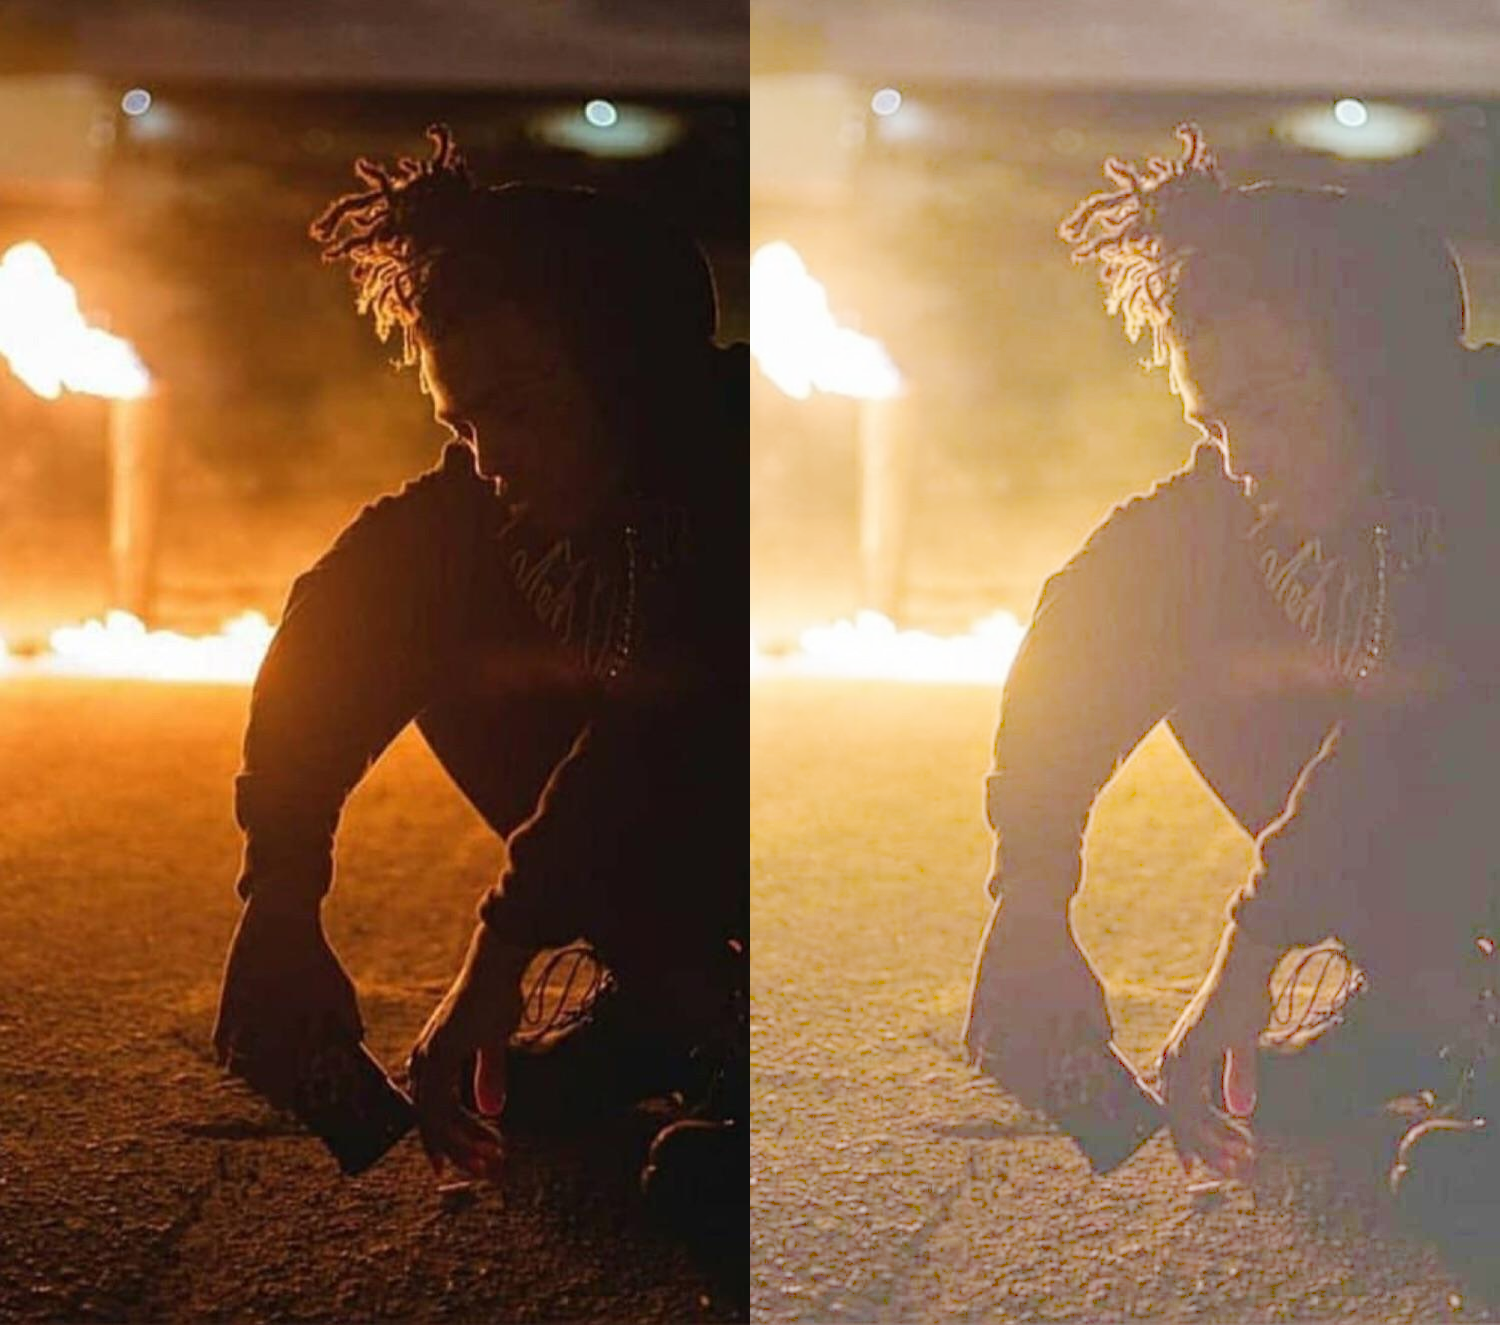

In [43]:
# nomor 1
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

**nomor 3**

In [53]:
#nomer 3.1
from math import log10, sqrt 

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

original = cv.imread('/content/drive/MyDrive/pcvk/img/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/pcvk/img/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah = 5
for i in range(jumlah):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah)

psnr = PSNR(original, denoised_image)

print('PSNR value is ',psnr,' dB')

PSNR value is  19.52183654783593  dB


**Nomor 4**

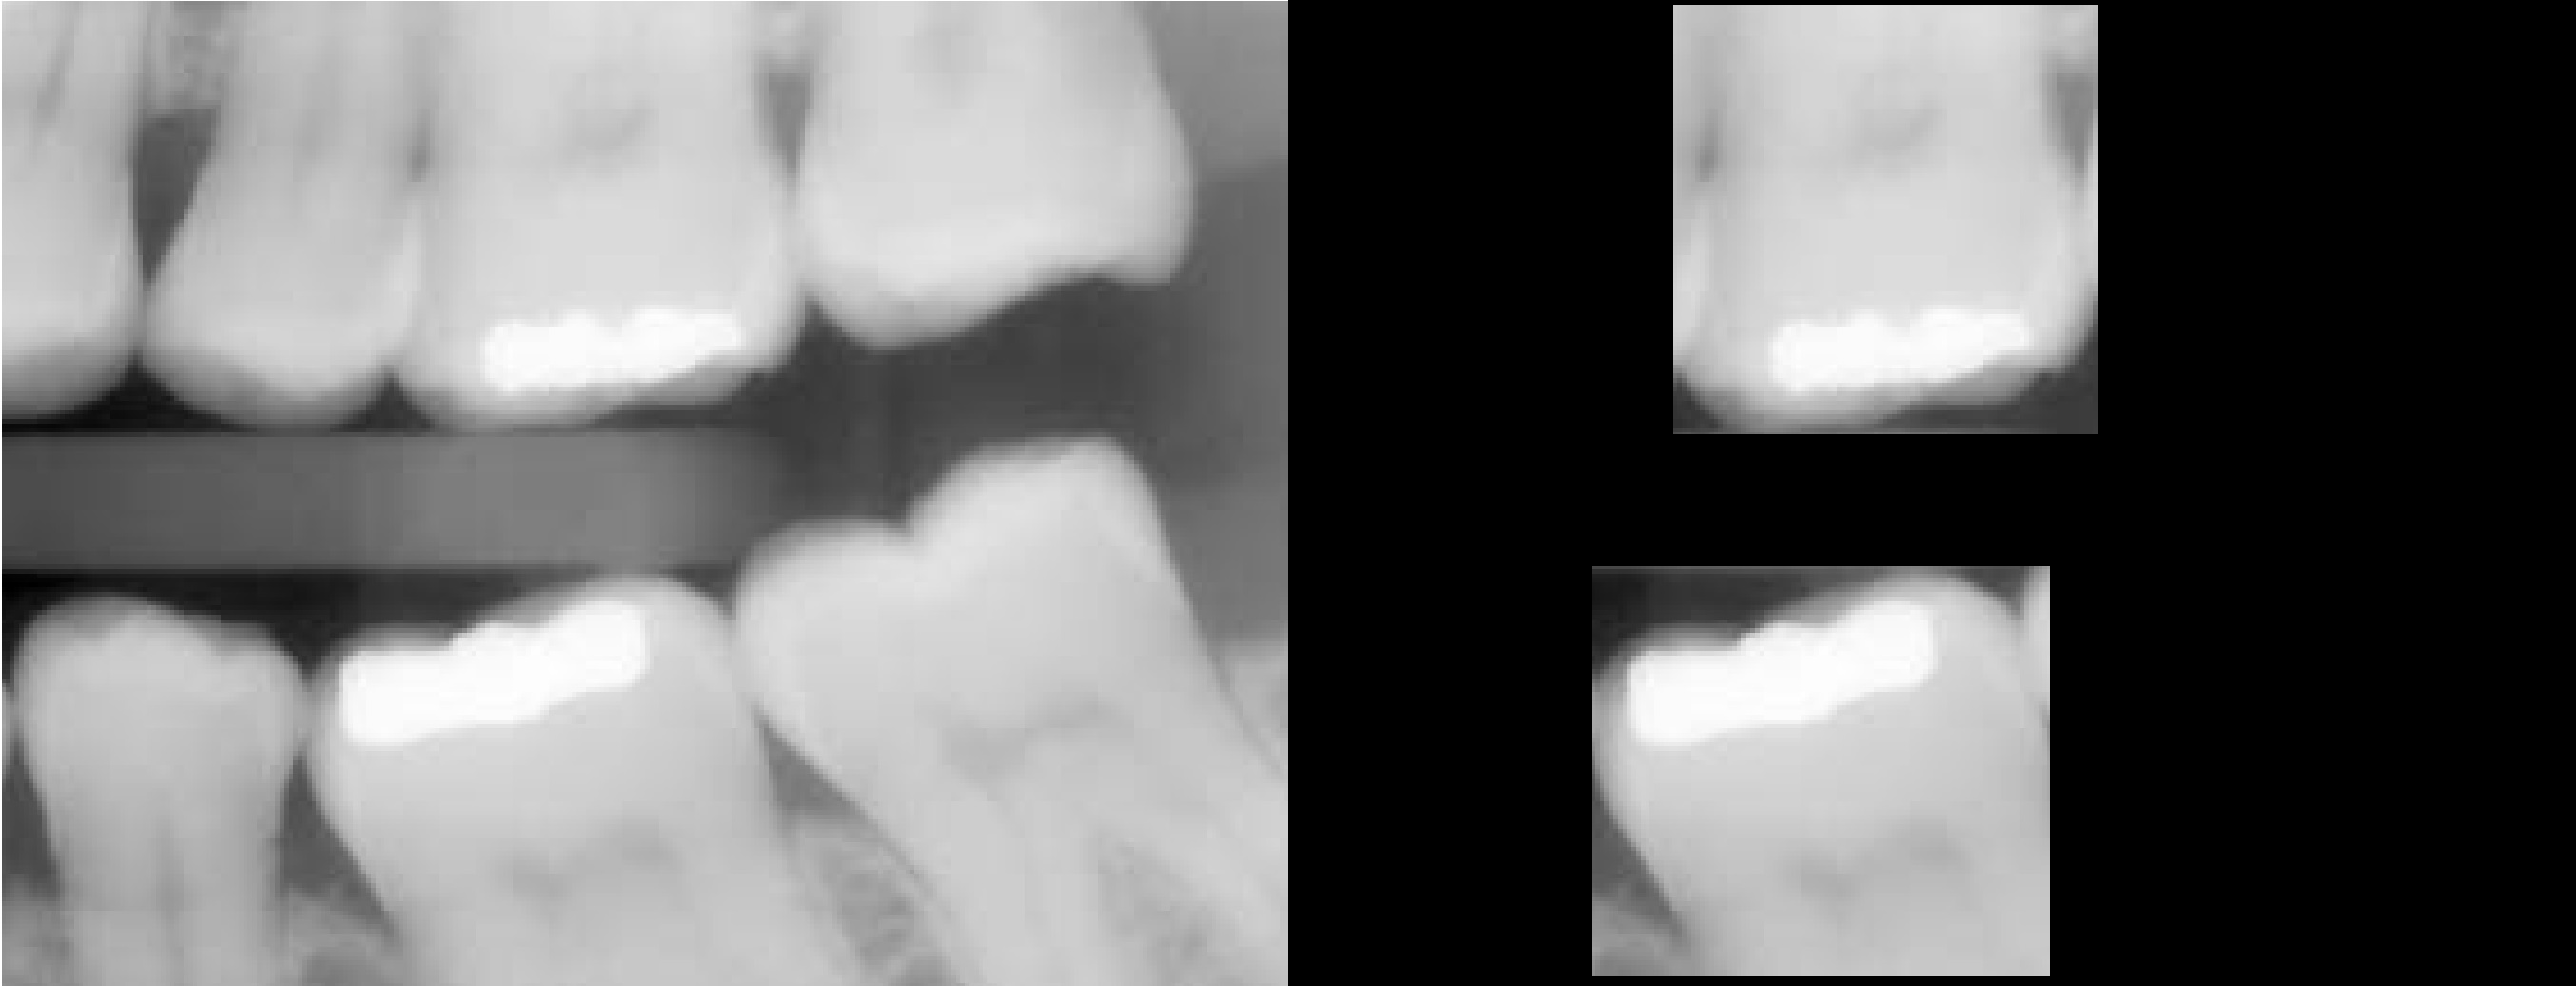

In [37]:
img = cv.imread('/content/drive/MyDrive/pcvk/img/teeth.jpg')
#img = cv.resize(img, (0,0), fx=0.5, fy=0.5) 
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img & mask1

final_frame = cv.hconcat((img, result))
cv2_imshow(final_frame)

**Nomor 5**

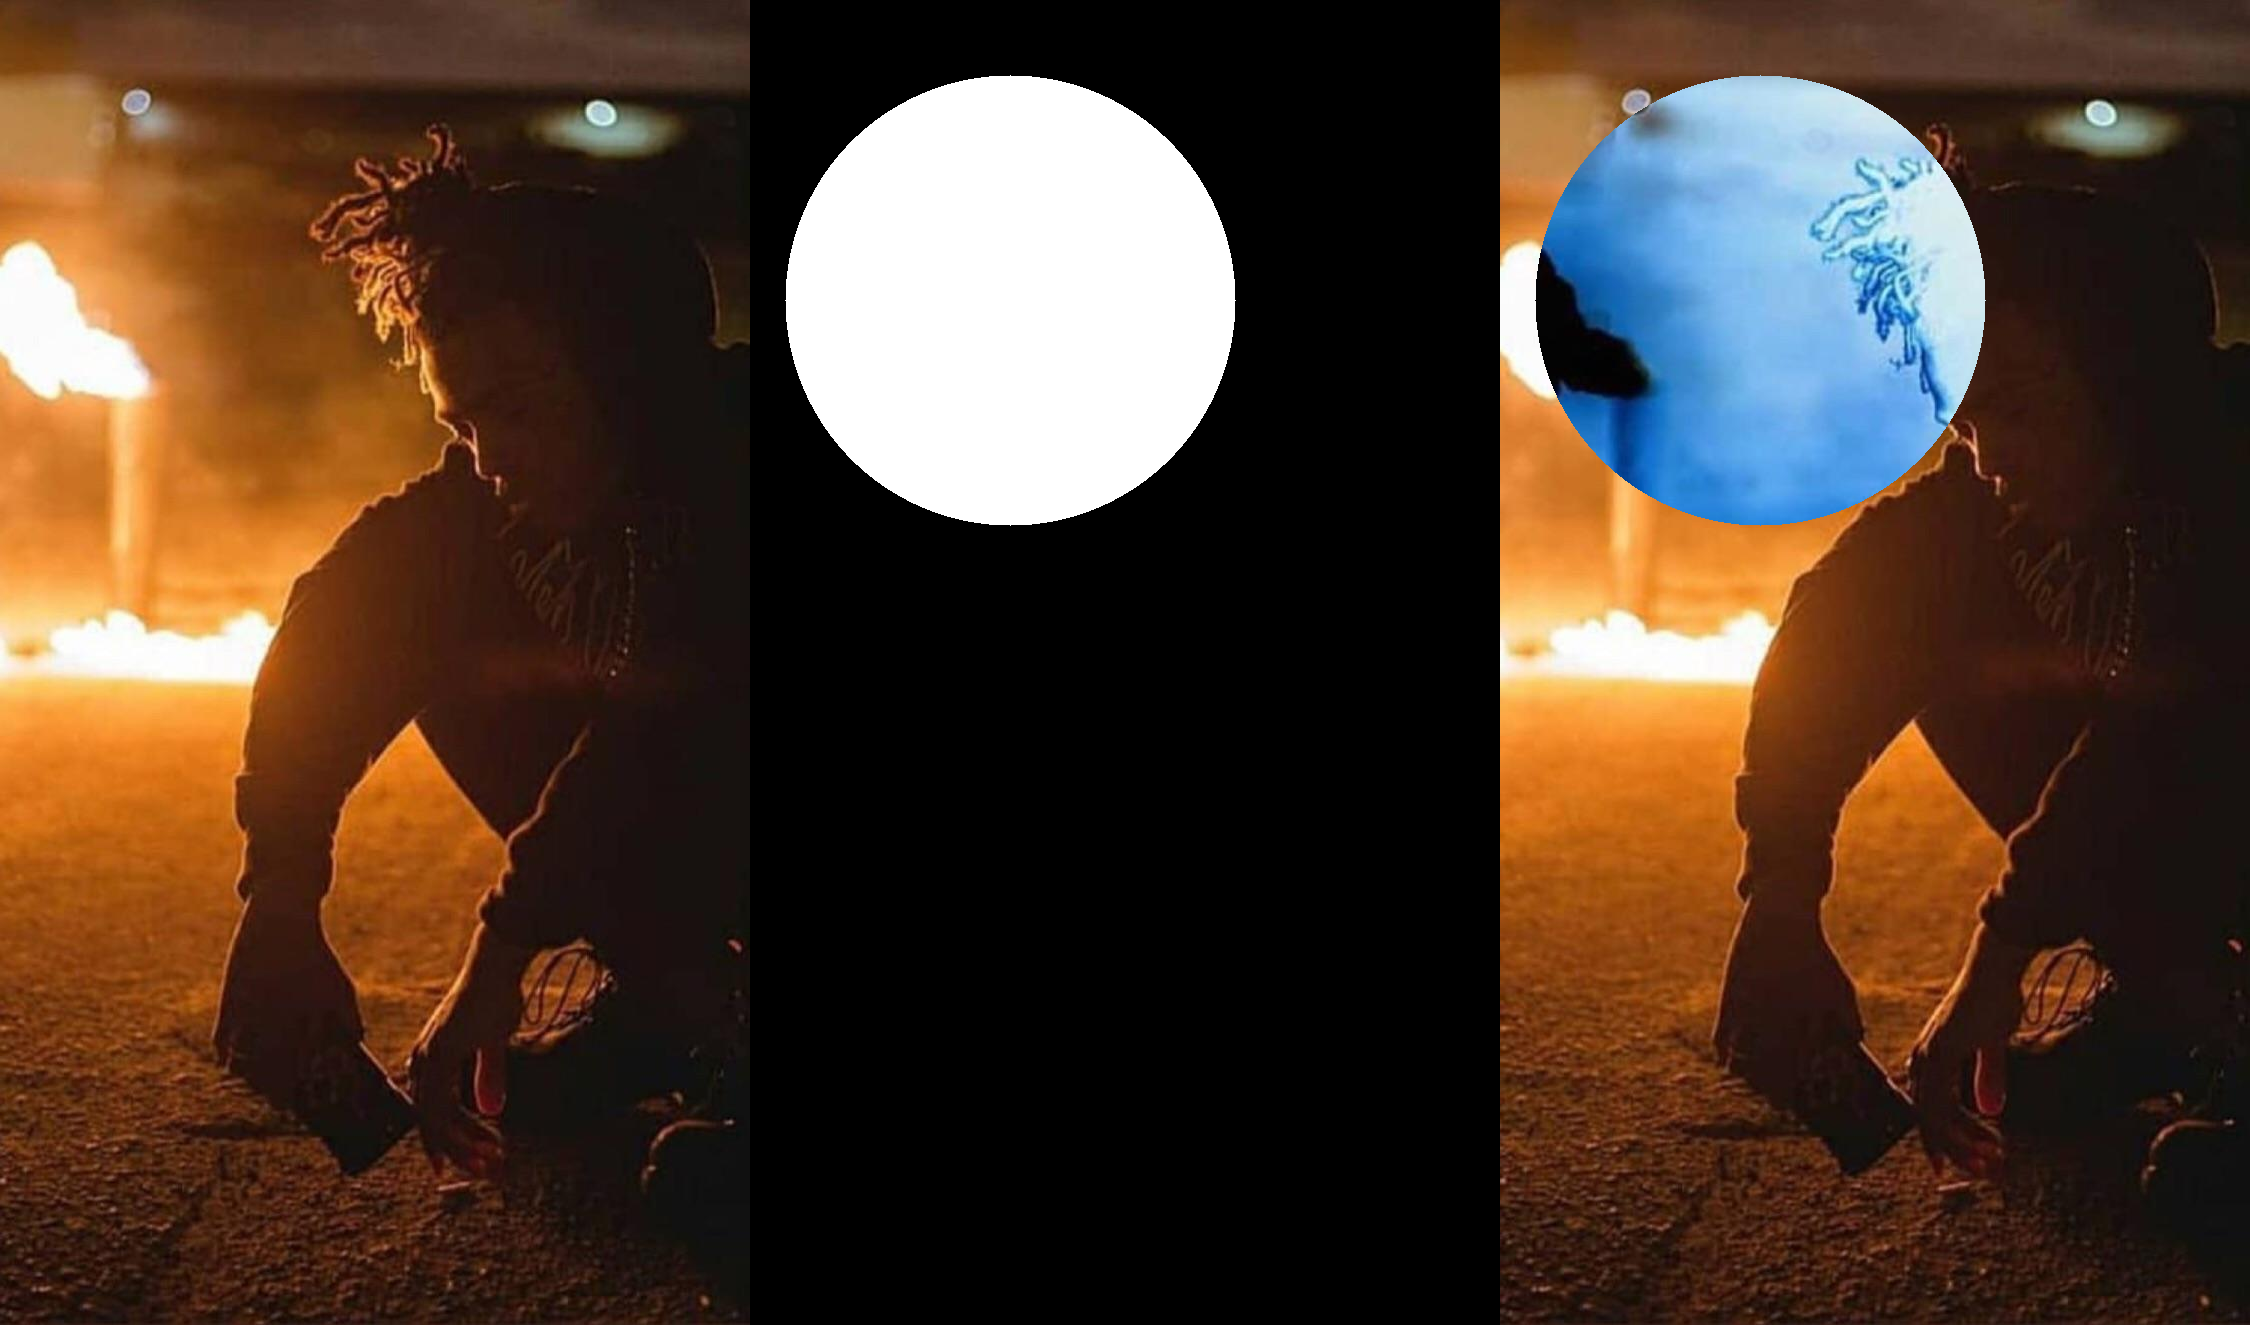

In [55]:
# AND
img = cv.imread('/content/drive/MyDrive/pcvk/img/riot.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 225, (255,255,255), -1)

result = img ^ mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

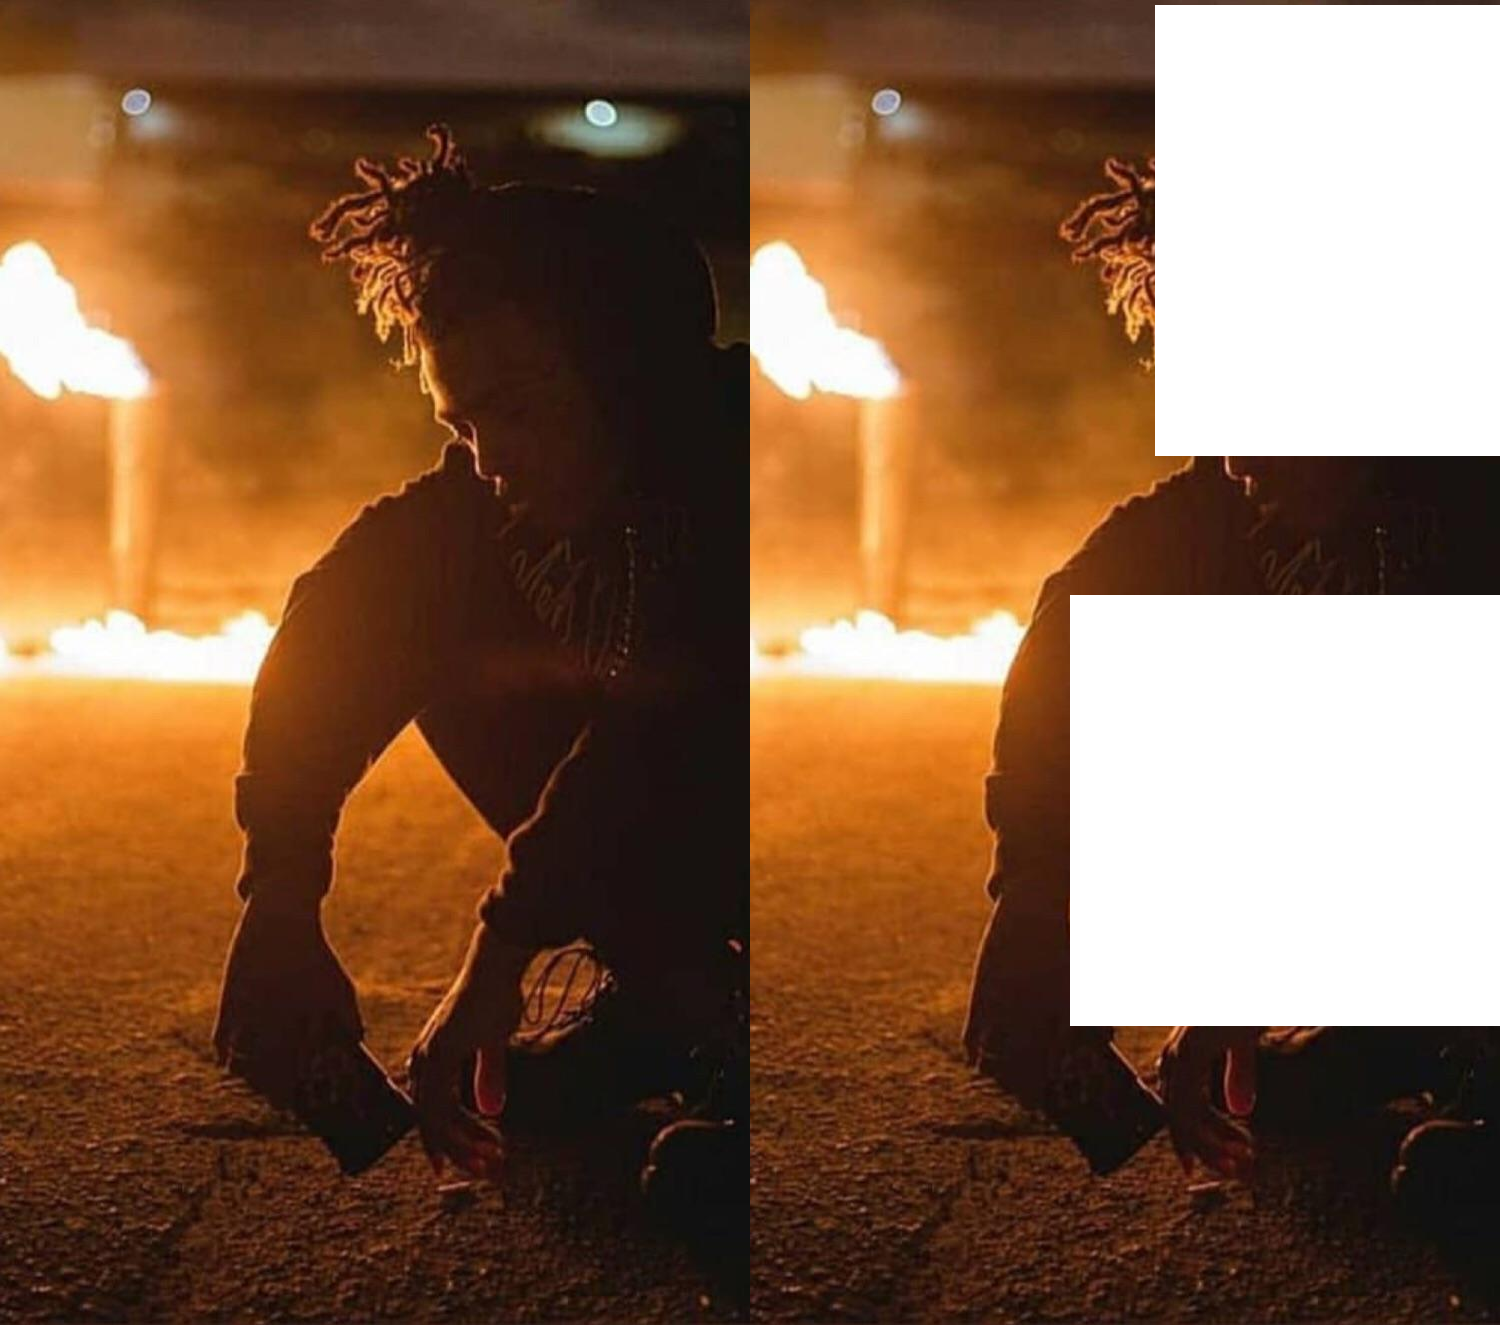

In [56]:
#OR

img = cv.imread('/content/drive/MyDrive/pcvk/img/riot.jpg')
mask_or = np.zeros(img.shape, dtype=np.uint8)
mask_or = cv.rectangle(mask_or,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = img | mask_or

mask_or1 = cv.rectangle(mask_or,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_or1 = img | mask_or1

final_frame = cv.hconcat((img, result_or1))
cv2_imshow(final_frame)

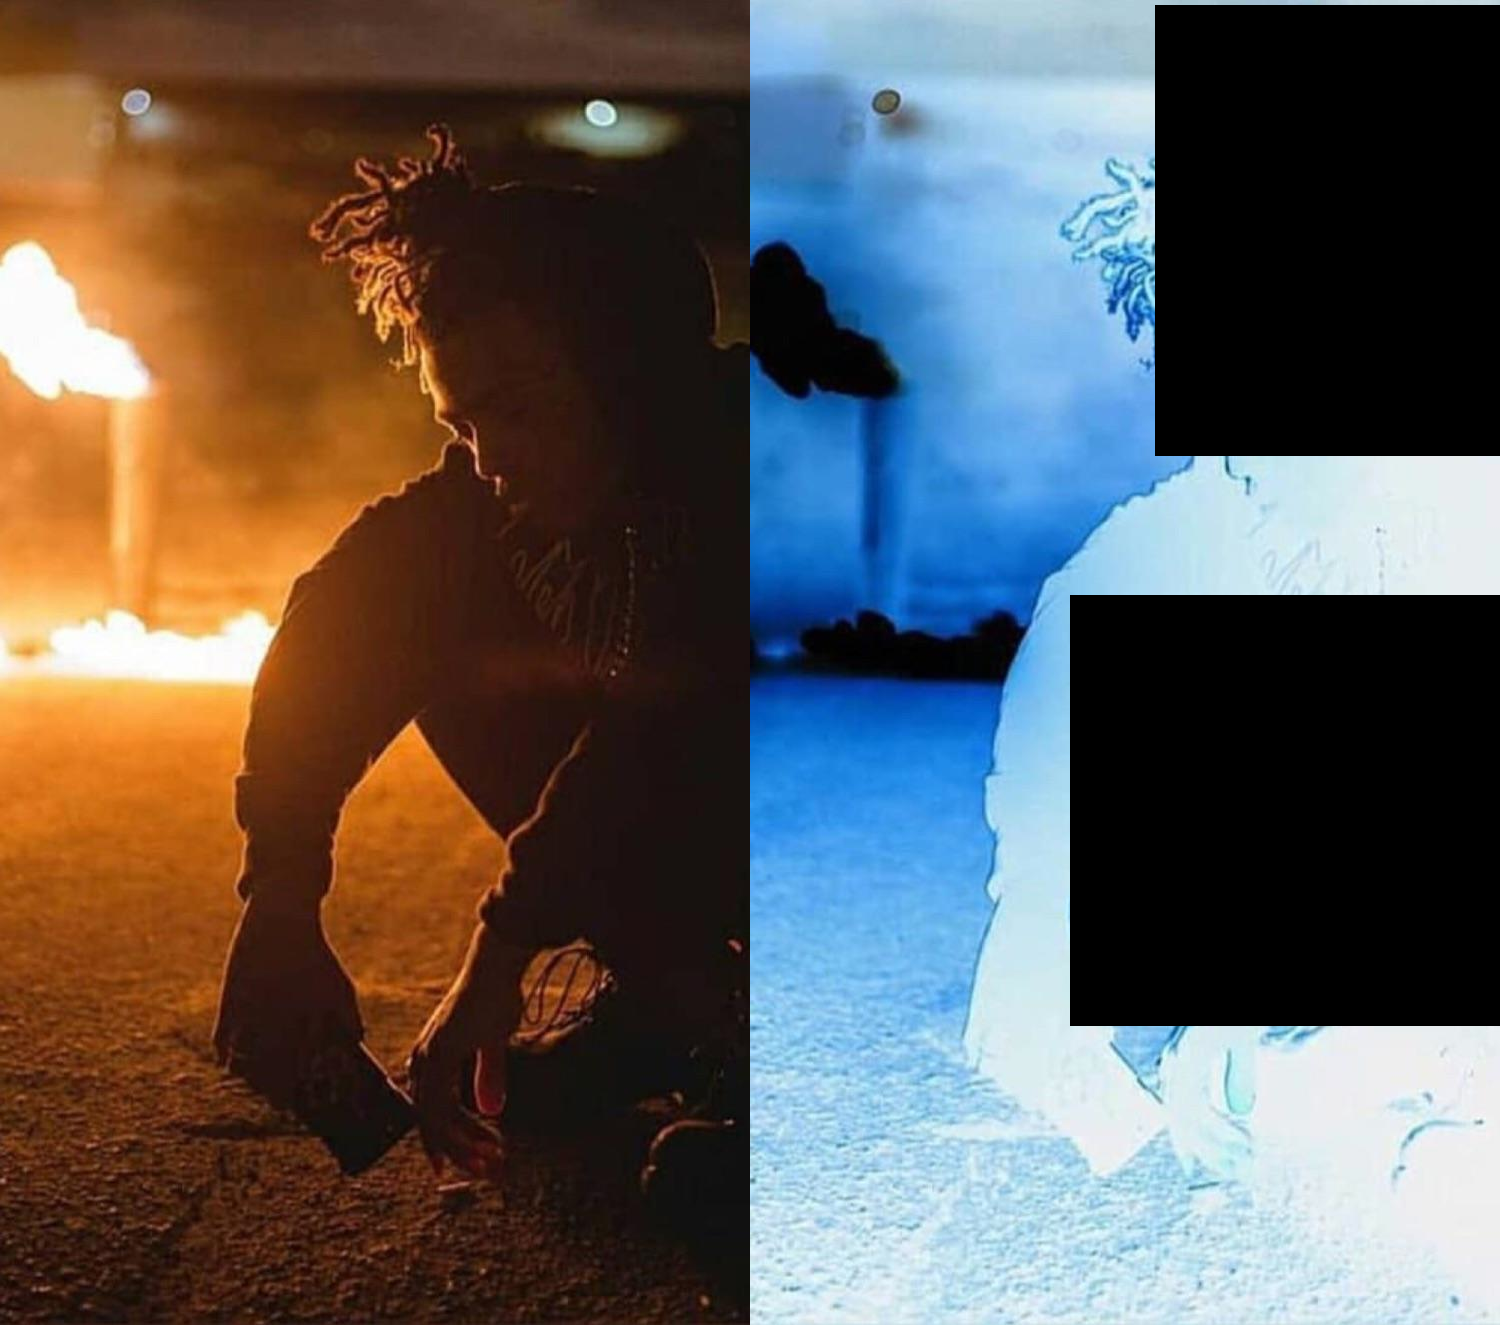

In [61]:
# NOT

img = cv.imread('/content/drive/MyDrive/pcvk/img/riot.jpg')
mask_not = np.zeros(img.shape, dtype=np.uint8)
mask_not = cv.rectangle(mask_not,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)

result = ~img & ~mask_not

mask_not1 = cv.rectangle(mask_not,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result_not1 = ~img & ~mask_not1

final_frame = cv.hconcat((img, result_not1))
cv2_imshow(final_frame)

Tuliskan hasil analisa anda:

membuat aplikasi Gamma Correction,membuat simulasi Citra dengan image depth yang ditentukan, melakukan denoising dengan menggunakan Averaging,melakukan image masking menggunakan logical operator

Operator and hanya akan menghasilkan True jika kedua operand bernilai True, selain itu hasilnya False.
Operator or hanya akan menghasilkan True jika salah satu operand bernilai True. Operator or hanya bernilai False jika kedua operand juga bernilai False.
 Operator not akan membalikkan logika, not False menghasilkan True, dan not True menghasilkan False.
